In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt

!pip install PySpice

!cat /etc/*release 
!rm libngspice.so*
!rm libngspice.la*
!wget http://www.pcs.cnu.edu/~brash/libngspice.so
!wget http://www.pcs.cnu.edu/~brash/libngspice.la

!rm /usr/local/lib/libngspice.*
!cp /content/libngspice.so /usr/local/lib/libngspice.so.0.0.0
!ln -snf /usr/local/lib/libngspice.so.0.0.0 /usr/local/lib/libngspice.so.0
!ln -snf /usr/local/lib/libngspice.so.0.0.0 /usr/local/lib/libngspice.so
!cp /content/libngspice.la /usr/local/lib/libngspice.la
!ls -al /usr/local/lib
!sudo ldconfig

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

from PySpice.Plot.BodeDiagram import bode_diagram
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=18.04
DISTRIB_CODENAME=bionic
DISTRIB_DESCRIPTION="Ubuntu 18.04.5 LTS"
NAME="Ubuntu"
VERSION="18.04.5 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.5 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic
--2020-12-22 00:57:54--  http://www.pcs.cnu.edu/~brash/libngspice.so
Resolving www.pcs.cnu.edu (www.pcs.cnu.edu)... 137.155.2.49
Connecting to www.pcs.cnu.edu (www.pcs.cnu.edu)|137.155.2.49|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.pcs.cnu.edu/~brash/libngspice.so [following]
--2020-12-22 00:57:55--  https://www.pcs.cnu.edu/~brash/libngspice.so
Connecting to www.pcs.cnu.edu (www.pcs.cnu.edu)|137.155.2.49|:443... connected.
HTTP request sent, awa

In [2]:
circuit1 = Circuit('Four double-pole Low-Pass RLC Filter')

inductance = 2653000@u_mH
capacitance = 1@u_uF

circuit1.SinusoidalVoltageSource('input', 'in', circuit1.gnd, amplitude=1@u_V)
# Q = .5
circuit1.C(1, 'out5', circuit1.gnd, capacitance)
circuit1.C(2, 'out1', circuit1.gnd, capacitance)
circuit1.L(1, 1, 'out5', inductance)
# Q = 1
circuit1.R(1, 'in', 1, 200@u_Ω)
circuit1.R(2, 'in', 2, 100@u_Ω)
circuit1.R(3, 'in', 3, 50@u_Ω)
circuit1.C(3, 'out2', circuit1.gnd, capacitance)
circuit1.L(2, 2, 'out1', inductance)
# Q = 2
circuit1.L(3, 3, 'out2', inductance)
# Q = 4
R4 = circuit1.R(4, 'in', 4, 25@u_Ω)
circuit1.L(4, 4, 'out4', inductance)
circuit1.C(4, 'out4', circuit1.gnd, capacitance)

2020-12-22 00:57:57,798 - PySpice.Spice.Netlist.Node.__init__ - WARNING - Node name 'in' is a Python keyword


Capacitor C4

In [3]:
simulator1 = circuit1.simulator(temperature=25, nominal_temperature=25)
analysis1 = simulator1.ac(start_frequency=100@u_Hz, stop_frequency=10@u_kHz, number_of_points=100,  variation='dec')

2020-12-22 00:57:57,927 - PySpice.Spice.NgSpice.Shared.NgSpiceShared._send_char - WARNING - spinit was not found
2020-12-22 00:57:57,928 - PySpice.Spice.NgSpice.Shared.NgSpiceShared._send_char - ERROR - Note: can't find init file.


In [4]:
resonant_frequency = 1 / (2 * math.pi * inductance * capacitance)
quality_factor = 1 / R4.resistance * math.sqrt(inductance / capacitance)
print("notch frequency = {:.1f} Hz".format(resonant_frequency))
print("Factor of quality = {:.1f}".format(quality_factor))

notch frequency = 60.0 Hz
Factor of quality = 2060.3


2020-12-22 00:57:58,014 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
2020-12-22 00:57:58,015 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
2020-12-22 00:57:58,034 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
2020-12-22 00:57:58,035 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
2020-12-22 00:57:58,046 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
2020-12-22 00:57:58,050 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
2020-12-22 00:57:58,062 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
2020-12-22 00:57:58,068 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less


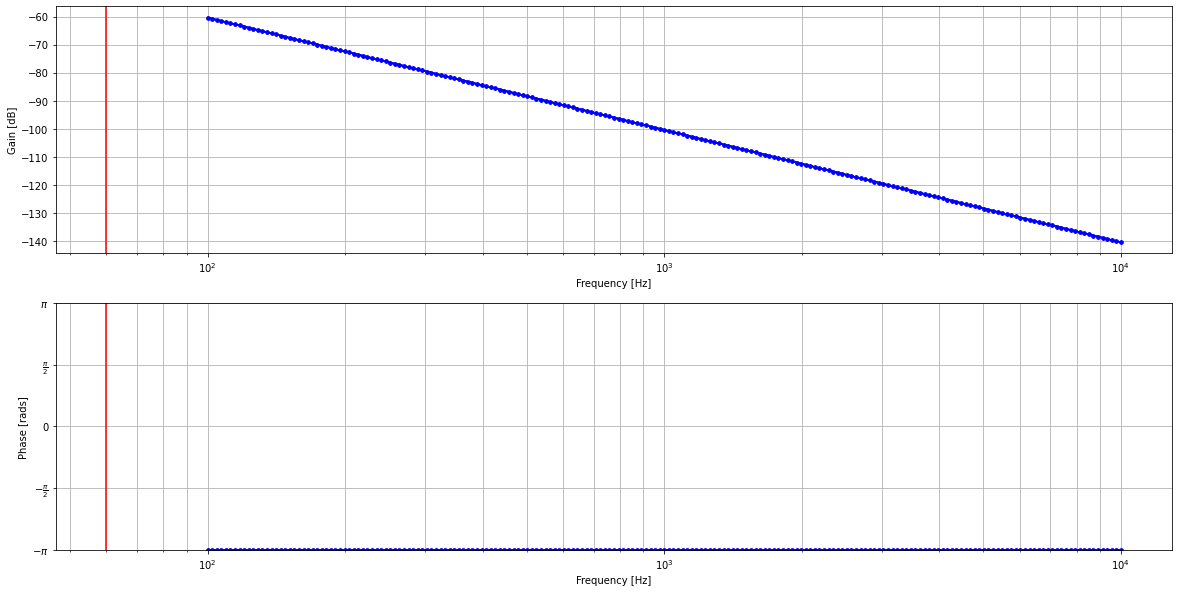

In [5]:
figure = plt.figure(1, (20, 10))
plt.title("Bode Diagrams of RLC Filters")
axes = (plt.subplot(211), plt.subplot(212))
for out in ('out5', 'out1', 'out2', 'out4'):
    bode_diagram(axes=axes,
                 frequency=analysis1.frequency,
                 gain=20*np.log10(np.absolute(analysis1[out])),
                 phase=np.angle(analysis1[out], deg=False),
                 marker='.',
                 color='blue',
                 linestyle='-',
    )
for axe in axes:
    axe.axvline(x=resonant_frequency, color='red')